# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **South San Francisco, California, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **South San Francisco, California, United States** to Ann Arbor, USA. In that case at least one source file must be about **South San Francisco, California, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **South San Francisco, California, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<IPython.core.display.Javascript object>


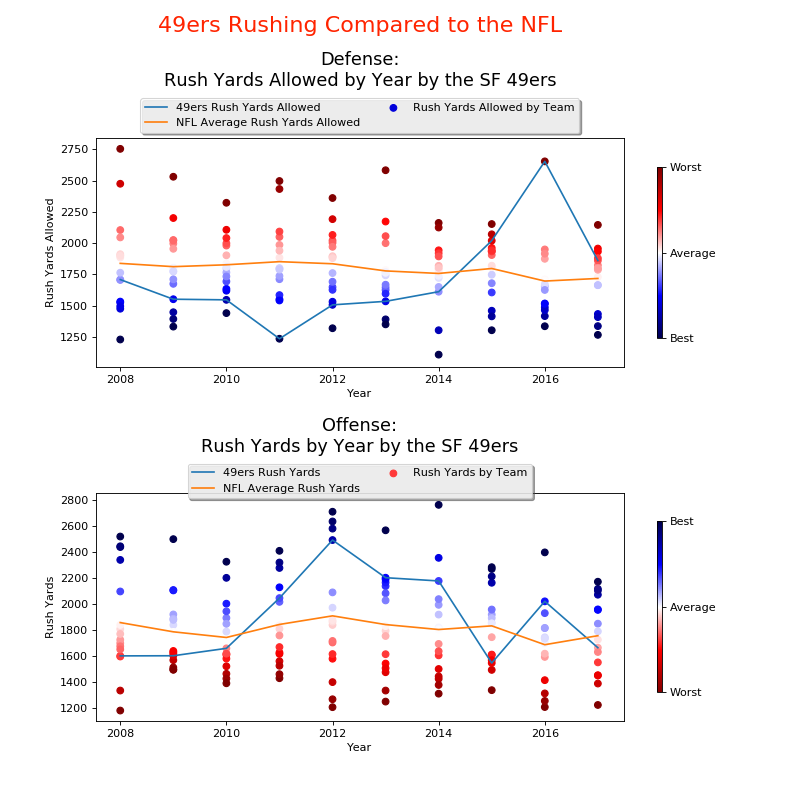

[]

In [1]:
# Marc Garard
# 11/27/2018
# https://en.wikipedia.org/wiki/List_of_San_Francisco_49ers_seasons
# https://www.footballdb.com/stats/index.html
# https://www.pro-football-reference.com/
#

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

# load the file and divide between defense and offense data
df = pd.read_csv('football2.csv', index_col = 'year')
df['Year'] = df.index
df_defense_sf = df[ (df['O_D'] == 'defense') & (df['Team'] == 'San Francisco 49ers') & (df.index < 2018) ]
df_defense = df[ (df['O_D'] == 'defense') & (df.index < 2018) ]
df_offense_sf = df[ (df['O_D'] == 'offense') & (df['Team'] == 'San Francisco 49ers') & (df.index < 2018) ]
df_offense = df[ (df['O_D'] == 'offense') & (df.index < 2018) ]

# set up color map
cmap = cm.seismic
norm = cm.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap  = cmap, norm = norm)
sm.set_array([])
cmap2 = cm.seismic_r
norm2 = cm.colors.Normalize(vmin=0, vmax=1)
sm2 = plt.cm.ScalarMappable(cmap  = cmap2, norm = norm2)
sm2.set_array([])

# determine the mean for scaling color and drawing plot
mean_defense = (df_defense.groupby('Year'))['RushYds'].mean()
mean_offense = (df_offense.groupby('Year'))['RushYds'].mean()

# plot the heat map for the NFL defense data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))
for y in (df_defense.groupby('Year')):
    # get mean, max, min for scaling each year data to color scale per year
    mean_D = y[1]['RushYds'].mean()
    min_D, max_D = min(y[1]['RushYds']), max(y[1]['RushYds'])
    colorScale = [ (0.5 + 0.5*( ( i-mean_D ) / ( max_D-mean_D ) ) ) 
                  if (i >= mean_D) else ( 0.5 * ( i - min_D ) / ( mean_D-min_D )) for i in y[1]['RushYds'] ]
    ax1.scatter(y[1]['Year'], y[1]['RushYds'], color = cmap(colorScale), label = 'Rush Yards Allowed by Team');
# add the mean and SF 49ers defense data
cbar = fig.colorbar(sm, ax = ax1, orientation = 'vertical', ticks = [0, 0.5, 1], aspect = 30, shrink = 0.75 )
cbar.ax.set_yticklabels(['Best', 'Average', 'Worst'])

ax1.plot(df_defense_sf['Year'], df_defense_sf['RushYds'], label = '49ers Rush Yards Allowed');
ax1.plot(df_defense_sf['Year'], mean_defense, label = 'NFL Average Rush Yards Allowed' );
ax1.set_ylabel('Rush Yards Allowed')
ax1.set_xlabel('Year')
ax1.set_title('Defense:\nRush Yards Allowed by Year by the SF 49ers', y = 1.20, fontsize = 16)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=2, fancybox=True, shadow=True,labels = 
           (('49ers Rush Yards Allowed','NFL Average Rush Yards Allowed','Rush Yards Allowed by Team')))


# plot the heat map of the NFL offense data
for y in (df_offense.groupby('Year')):
    # get mean, max, min for scaling each year data to color scale per year
    mean_O = y[1]['RushYds'].mean()
    min_O, max_O = min(y[1]['RushYds']), max(y[1]['RushYds'])
    colorScale = [ 1-(0.5 + 0.5*( ( i-mean_O ) / ( max_O-mean_O ) ) ) 
                  if (i >= mean_O) else 1-( 0.5 * ( i - min_O ) / ( mean_O-min_O ) ) for i in y[1]['RushYds'] ]
    ax2.scatter(y[1]['Year'], y[1]['RushYds'], color = cmap(colorScale), label = 'Rush Yards by Team');
cbar2 = fig.colorbar(sm2, ax = ax2, orientation = 'vertical', ticks = [1, 0.5, 0], aspect = 30, shrink = 0.75 )
cbar2.ax.set_yticklabels(['Best', 'Average', 'Worst'])
# add the mean and SF 49ers offense data
ax2.plot(df_offense_sf['Year'], df_offense_sf['RushYds'], label = '49ers Rush Yards');
ax2.plot(df_offense_sf['Year'], mean_offense, label = 'NFL Average Rush Yards');
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True,labels = (('49ers Rush Yards','NFL Average Rush Yards','Rush Yards by Team')))
ax2.set_ylabel('Rush Yards')
ax2.set_xlabel('Year')
ax2.set_title('Offense:\nRush Yards by Year by the SF 49ers', y = 1.15, fontsize = 16)

# adjust layout, etc.
plt.tight_layout(pad = 4, w_pad = 5, h_pad = 1)
plt.suptitle('49ers Rushing Compared to the NFL', color='#ff2400', fontsize = 20, x = 0.45)

plt.plot()